In [15]:
!unzip /content/drive/MyDrive/ML_Project/Data/Components-Real.zip
!unzip /content/drive/MyDrive/ML_Project/Data/Products-Real.zip
!unzip /content/drive/MyDrive/ML_Project/Data/Date-Real.zip


unzip:  cannot find or open /content/drive/MyDrive/ML_Project/Data/Components-Real.zip, /content/drive/MyDrive/ML_Project/Data/Components-Real.zip.zip or /content/drive/MyDrive/ML_Project/Data/Components-Real.zip.ZIP.
unzip:  cannot find or open /content/drive/MyDrive/ML_Project/Data/Products-Real.zip, /content/drive/MyDrive/ML_Project/Data/Products-Real.zip.zip or /content/drive/MyDrive/ML_Project/Data/Products-Real.zip.ZIP.
unzip:  cannot find or open /content/drive/MyDrive/ML_Project/Data/Date-Real.zip, /content/drive/MyDrive/ML_Project/Data/Date-Real.zip.zip or /content/drive/MyDrive/ML_Project/Data/Date-Real.zip.ZIP.


In [16]:
pip install opencv-python

(252, 338, 3)


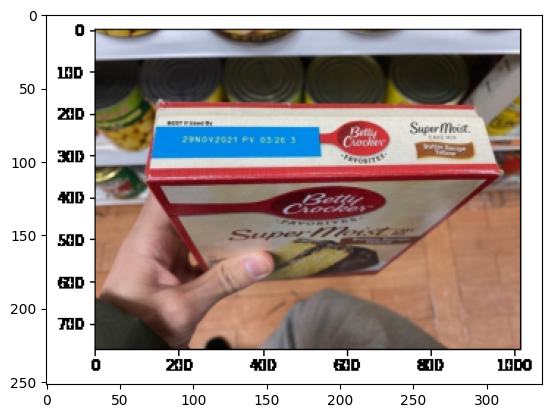

In [17]:
import cv2


file = '/content/image_path.png'
img = cv2.imread(file)
print(img.shape)


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import cv2
from scipy.stats import stats
import matplotlib.image as mpimg


img = cv2.cvtColor(cv2.imread('/content/image_path.png'), cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

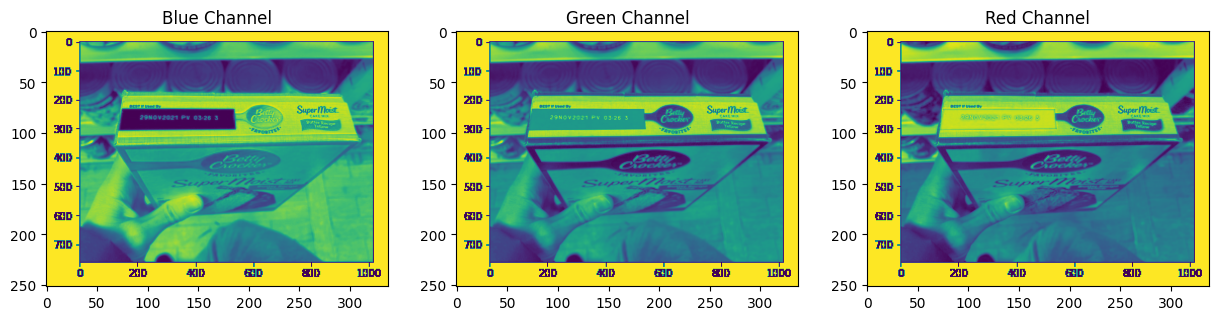

In [18]:
#Splitting into channels
blue,green,red = cv2.split(img)
# Plotting the images
fig = plt.figure(figsize = (15, 7.2))
fig.add_subplot(131)
plt.title("Blue Channel")
plt.imshow(blue)
fig.add_subplot(132)
plt.title("Green Channel")
plt.imshow(green)
fig.add_subplot(133)
plt.title("Red Channel")
plt.imshow(red)
plt.show()

In [19]:
blue_temp_df = pd.DataFrame(data = blue)
display(blue_temp_df)


df_blue = blue/255
df_green = green/255
df_red = red/255


pca_b = PCA(n_components=50)
pca_b.fit(df_blue)
trans_pca_b = pca_b.transform(df_blue)
pca_g = PCA(n_components=50)
pca_g.fit(df_green)
trans_pca_g = pca_g.transform(df_green)
pca_r = PCA(n_components=50)
pca_r.fit(df_red)
trans_pca_r = pca_r.transform(df_red)


print(f"Blue Channel : {sum(pca_b.explained_variance_ratio_)}")
print(f"Green Channel: {sum(pca_g.explained_variance_ratio_)}")
print(f"Red Channel  : {sum(pca_r.explained_variance_ratio_)}")


,0,1,2,3,4,5,6,7,8,9,...,328,329,330,331,332,333,334,335,336,337
0,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
1,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
2,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
3,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
4,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
248,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
249,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
250,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255


Blue Channel : 0.9911260457639349
Green Channel: 0.9897629367358589
Red Channel  : 0.9917253509680047


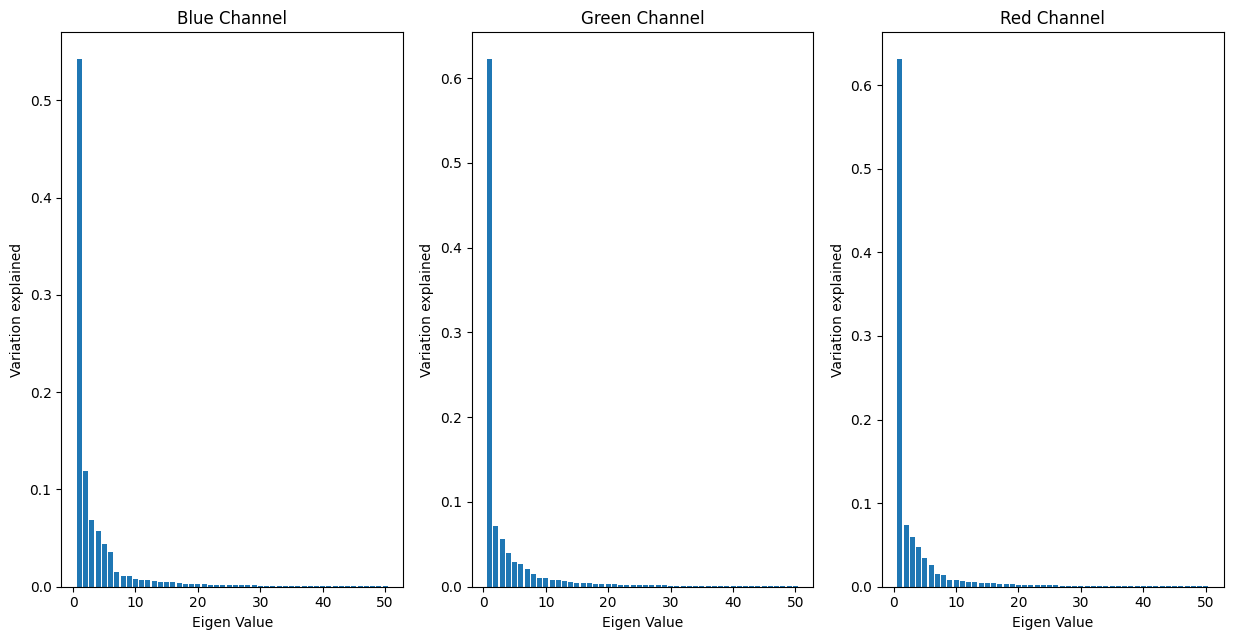

In [20]:
fig = plt.figure(figsize = (15, 7.2))
fig.add_subplot(131)
plt.title("Blue Channel")
plt.ylabel('Variation explained')
plt.xlabel('Eigen Value')
plt.bar(list(range(1,51)),pca_b.explained_variance_ratio_)
fig.add_subplot(132)
plt.title("Green Channel")
plt.ylabel('Variation explained')
plt.xlabel('Eigen Value')
plt.bar(list(range(1,51)),pca_g.explained_variance_ratio_)
fig.add_subplot(133)
plt.title("Red Channel")
plt.ylabel('Variation explained')
plt.xlabel('Eigen Value')
plt.bar(list(range(1,51)),pca_r.explained_variance_ratio_)
plt.show()

In [21]:
b_arr = pca_b.inverse_transform(trans_pca_b)
g_arr = pca_g.inverse_transform(trans_pca_g)
r_arr = pca_r.inverse_transform(trans_pca_r)
print(b_arr.shape, g_arr.shape, r_arr.shape)

(252, 338) (252, 338) (252, 338)


In [22]:
img_reduced = (cv2.merge((b_arr, g_arr, r_arr)))
print(img_reduced.shape)

(252, 338, 3)


In [23]:
import os


DESTINATION_PATH  = '/content/MyDrive/downloads/image/'

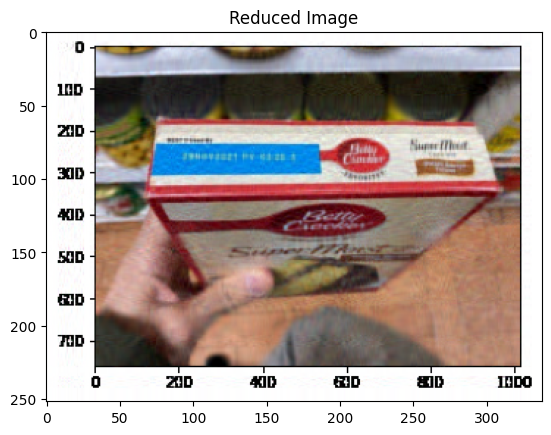

In [24]:
base_filename = os.path.basename('/content/image_path.png')
title, ext = os.path.splitext(base_filename)


final_filepath = os.path.join(DESTINATION_PATH,'tp_'+ title + ext)


plt.title("Reduced Image")
plt.imshow(img_reduced)
plt.show()

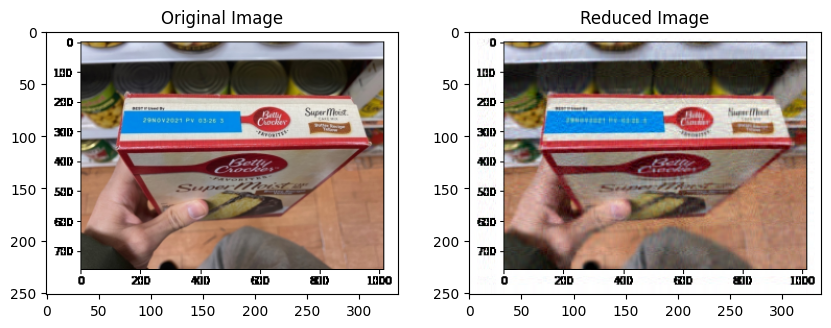

In [25]:
fig = plt.figure(figsize = (10, 7.2))
fig.add_subplot(121)
plt.title("Original Image")
plt.imshow(img)
fig.add_subplot(122)
plt.title("Reduced Image")
plt.imshow(img_reduced)
plt.show()

RUNNING PCA ON ALL IMAGES

In [14]:
import os
import glob
from PIL import Image

files = glob.glob('/content/image_path.png')
DESTINATION_PATH  = '/content/MyDrive/downloads/image/'  # The preferred path for saving the processed image

for f in files:
    print(f)
    base_filename = os.path.basename(f)
    title, ext = os.path.splitext(base_filename)

    img = cv2.cvtColor(cv2.imread(f), cv2.COLOR_BGR2RGB)
    blue,green,red = cv2.split(img)
    df_blue = blue/255
    df_green = green/255
    df_red = red/255
    pca_b = PCA(n_components=50)
    pca_b.fit(df_blue)
    trans_pca_b = pca_b.transform(df_blue)
    pca_g = PCA(n_components=50)
    pca_g.fit(df_green)
    trans_pca_g = pca_g.transform(df_green)
    pca_r = PCA(n_components=50)
    pca_r.fit(df_red)
    trans_pca_r = pca_r.transform(df_red)
    b_arr = pca_b.inverse_transform(trans_pca_b)
    g_arr = pca_g.inverse_transform(trans_pca_g)
    r_arr = pca_r.inverse_transform(trans_pca_r)

    img_reduced= (cv2.merge((b_arr, g_arr, r_arr)))
    img_new = img_reduced*255

    final_filepath = os.path.join(DESTINATION_PATH, title + ext)
    cv2.imwrite(final_filepath, img_new)


/content/image_path.png
